In [1]:
# imports

import pandas as pd
import numpy as np
import openml
from AdaBoostWorkyWorky import AdaBoost
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# get the data from OpenML
# dataset from Task ID = 3904

suite = openml.study.get_suite(99)
task_id = 3904
task = openml.tasks.get_task(task_id)    
dataset = openml.datasets.get_dataset(task.dataset_id)

X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)

# Visualizar o dataset

df = pd.DataFrame(X, columns=attribute_names)
# converter:
#   0 -> -1
#   1 -> 1
df['target'] = 2*y-1 
df = df.dropna(how='any', axis=0)

X = df.drop(columns=['target'], axis=1)
y = df.target

df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,target
0,1.1,1.4,1.4,1.4,1.3,1.300000,1.30,1.300000,1.300000,1.300000,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,-1.0
1,1.0,1.0,1.0,1.0,1.0,1.000000,1.00,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,72.0,7.0,1.0,6.0,198.0,1134.130005,0.05,20.309999,55.849998,23029.099609,...,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,1.0
3,190.0,3.0,1.0,3.0,600.0,4348.759766,0.06,17.059999,254.869995,74202.671875,...,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,1.0
4,37.0,4.0,1.0,4.0,126.0,599.119995,0.06,17.190001,34.860001,10297.299805,...,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.479996,0.14,7.330000,32.930000,1770.859985,...,13.0,0.0,2.0,0.0,10.0,15.0,30.0,22.0,7.0,-1.0
10881,9.0,2.0,1.0,2.0,30.0,129.660004,0.12,8.250000,15.720000,1069.680054,...,5.0,0.0,2.0,0.0,12.0,8.0,19.0,11.0,3.0,-1.0
10882,42.0,4.0,1.0,2.0,103.0,519.570007,0.04,26.400000,19.680000,13716.719727,...,29.0,1.0,10.0,0.0,18.0,15.0,59.0,44.0,7.0,-1.0
10883,10.0,1.0,1.0,1.0,36.0,147.149994,0.12,8.440000,17.440001,1241.569946,...,6.0,0.0,2.0,0.0,9.0,8.0,21.0,15.0,1.0,-1.0


In [3]:
models = [
    ("default", AdaBoost(0)),
    ("Alpha 1", AdaBoost(1)),
    ("Alpha 2", AdaBoost(2)),
    ("Alpha 3", AdaBoost(3)),


]

models

[('default', <AdaBoostWorkyWorky.AdaBoost at 0x7fa577768820>),
 ('Alpha 1', <AdaBoostWorkyWorky.AdaBoost at 0x7fa577768640>),
 ('Alpha 2', <AdaBoostWorkyWorky.AdaBoost at 0x7fa577768ee0>),
 ('Alpha 3', <AdaBoostWorkyWorky.AdaBoost at 0x7fa577768d00>)]

In [4]:
# run cross-validation on an algorithm

def run_cv(X,y,algs,nfolds=10):
    results = {}
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=1111)
    for algo_name, algo in algs:
        results[algo_name] = []
        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            algo.fit(X_train, y_train)
            y_pred = algo.predict(X_test)
            results[algo_name].append(accuracy_score(y_test, y_pred))
    results_df = pd.DataFrame.from_dict(results)
    return results_df


In [5]:
results = run_cv(X, y, models)

results

0.5587345687185883
0.2667515121988649
0.1646084447132243
0.06093241429716601
0.08281641101363495
0.06362144032263509
0.036566686446185014
-0.02731687946523982
-0.0206575219571479
0.028709937301191066
-0.00826240884798021
-0.012411247225807217
-0.0048622056495583
-0.0019103084319634493
0.01921872471551513
0.007618840922119075
-0.006184865358976948
-0.0024287460685370674
-0.0009551085046854436
-0.0003758071523524452
0.009537663727505362
-0.0032677764809911553
0.047912029049886624
-0.00411910089687567
-0.001618806896639275
-0.0006367934340610814
0.025753826694733667
-0.011388477481290639
-0.004463279882718346
-0.0017538402897574771
-0.0006898766145470469
-0.0002714733478423621
-0.00010684432815128368
-4.20535521827385e-05
-1.6552534402227873e-05
-6.515240980411585e-06
0.016663258987793497
-0.0070770840451066415
-0.0027781691713607026
-0.0010923753399132644
-0.00042979536176036197
0.024694703113699347
-0.00999817084190791
-0.003920490481506296
-0.0015408690120826331
-0.0006061526864694006


,default,Alpha 1,Alpha 2,Alpha 3
0,0.826287,0.822610,0.821691,0.816176
1,0.806066,0.810662,0.800551,0.803309
2,0.807904,0.818015,0.790441,0.813419
3,0.815257,0.821691,0.775735,0.817096
4,0.795956,0.796875,0.775735,0.793199
5,0.798713,0.799632,0.789522,0.804228
6,0.812500,0.815257,0.795037,0.818015
7,0.817096,0.819853,0.812500,0.818015
8,0.795956,0.796875,0.795037,0.786765
9,0.812500,0.806066,0.786765,0.805147


In [6]:
# Plot the results using a box plot

def plot_cv(results_cv,metric='Accuracy'):
    fig, ax = plt.subplots()
    ax.boxplot(results_cv)
    ax.set_xticklabels(results_cv.columns)
    ax.set_ylabel(metric)
    ax.set_title("Cross-validation results for multiple algorithms in a single task")
    plt.show()

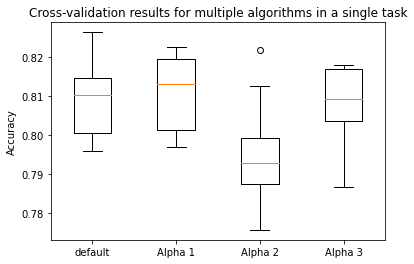

In [7]:
plot_cv(results)

In [8]:
# Plot the results using a bar plot with error bars
def plot_cv_estimates(results_cv,metric='Accuracy'):
    fig, ax = plt.subplots()
    ax.bar(results_cv.columns, results_cv.mean(), yerr=results_cv.std() / np.sqrt(results_cv.shape[0]), capsize=5)
    ax.set_ylabel(metric)
    ax.set_title("Cross-validation results for multiple algorithms in a single task")
    plt.show()

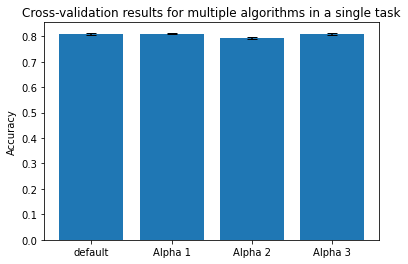

In [9]:
plot_cv_estimates(results)

In [10]:
 # Plot the results using a bar plot with error bars and color-coded with the relation between p-value and alpha (default value is 0.05)
def plot_cv_stat(results_cv, alpha=0.05, baseline=None, stat_test="ttest", metric='accuracy'):

    if baseline is None:
        baseline=results_cv.columns[0]

    baseline_res = results_cv[baseline]

    other_res = results_cv.drop(baseline,axis=1)

    fig, ax = plt.subplots()
    ax.bar(baseline,baseline_res.mean(), yerr=baseline_res.std() / np.sqrt(baseline_res.shape[0]), capsize=5, color="grey")

    cols = []
    for alg in other_res:
        # Compute the statistical significance of each algorithm with respec
        if stat_test == 'ttest':
            test_stat, test_p = ss.ttest_rel(other_res[alg], baseline_res)
        elif stat_test == 'wilcoxon':
            test_stat, test_p = ss.wilcoxon(other_res[alg],baseline_res)
        if test_p < alpha:
            cols = cols + ['purple']
        else:
            cols = cols + ['blue']

    ax.bar(other_res.columns, other_res.mean(), yerr=other_res.std() / np.sqrt(other_res.shape[0]), capsize=5, color=cols)
    ax.set_ylabel(metric)
    ax.set_title("Cross-validation results for multiple algorithms in a single task")
    plt.show()


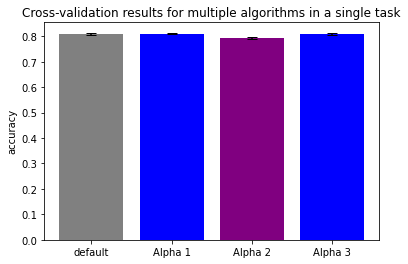

In [11]:
plot_cv_stat(results)